In [1]:
import networkx as nx
import pandas as pd

In [2]:
g = {
    0:[3,4],
    1:[0,2],
    2:[4,0, 1],
    3:[2],
    4:[3],
    
    }

In [3]:
G = nx.DiGraph(g)

In [4]:
nx.draw(G, with_labels = True)

# PageRank
https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

In [6]:
nx.pagerank(G, max_iter = 1000)

{0: 0.1608672646548668,
 1: 0.1128894706563309,
 2: 0.292549115189747,
 3: 0.252436577912309,
 4: 0.18125757158674627}

In [7]:
G.add_edges_from([(0,5), (5,6), (6,5)])

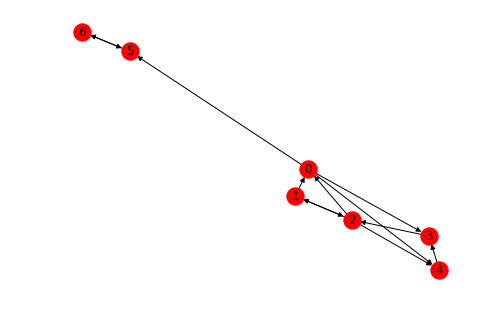

In [8]:
nx.draw(G, with_labels = True)

In [9]:
nx.pagerank(G, max_iter = 10000)

{0: 0.09402582826028087,
 1: 0.06598302798569738,
 2: 0.15725093399903384,
 3: 0.1267994166618401,
 4: 0.0926236929723514,
 5: 0.2388572802073485,
 6: 0.22445981991344788}

In [10]:
nx.pagerank(G, max_iter = 10000, alpha = 0.2)

{0: 0.13721317813051145,
 1: 0.12473923104056436,
 2: 0.156801848324515,
 3: 0.15021069488536157,
 4: 0.1338867865961199,
 5: 0.1523853968253968,
 6: 0.14476286419753087}

# HITS

In [70]:
nx.hits(G, max_iter = 1000)

({0: 0.2254311415438195,
  1: 0.2254311415438195,
  2: 0.4043943244048516,
  3: 0.07237169625375471,
  4: 0.07237169625375471},
 {0: 0.2787268850347282,
  1: 0.1789631831834384,
  2: 0.13179152337355254,
  3: 0.13179152337355254,
  4: 0.2787268850347282})

# Comparing Centrality measures

In [81]:
g = {
    'A':['B','C'],
    'B':['A','D'],
    'C':['A','E'],
    'D':['B','F', 'G'],
    'E':['C','H', 'I'],
    'F':['B','D', 'G'],
    'H':['C','E', 'I'],
    'G':['B'],
    'I':['C'],
    
    }

In [82]:
G = nx.DiGraph(g)

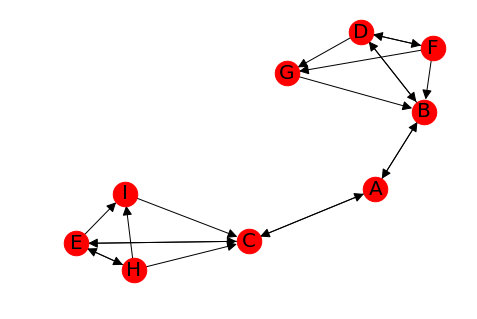

In [88]:
nx.draw(G, with_labels = True, font_size = 20, node_size = 600, arrowsize = 20, pos = nx.spring_layout(G))

In [99]:
dc = nx.degree_centrality(G)
sdc = sorted(tuple(zip(dc.keys(), dc.values())),key=lambda tup: tup[1], reverse=True)
sdc

[('B', 0.75),
 ('C', 0.75),
 ('D', 0.625),
 ('E', 0.625),
 ('A', 0.5),
 ('F', 0.5),
 ('H', 0.5),
 ('G', 0.375),
 ('I', 0.375)]

In [101]:
cc = nx.closeness_centrality(G)
ccc = sorted(tuple(zip(cc.keys(), cc.values())),key=lambda tup: tup[1], reverse=True)
ccc

[('A', 0.5714285714285714),
 ('B', 0.5333333333333333),
 ('C', 0.5333333333333333),
 ('D', 0.38095238095238093),
 ('E', 0.38095238095238093),
 ('G', 0.3076923076923077),
 ('I', 0.3076923076923077),
 ('F', 0.2857142857142857),
 ('H', 0.2857142857142857)]

In [103]:
bc = nx.betweenness_centrality(G)
bcc = sorted(tuple(zip(bc.keys(), bc.values())),key=lambda tup: tup[1], reverse=True)
bcc

[('A', 0.5714285714285714),
 ('B', 0.5714285714285714),
 ('C', 0.5714285714285714),
 ('D', 0.23214285714285712),
 ('E', 0.23214285714285712),
 ('F', 0.0),
 ('H', 0.0),
 ('G', 0.0),
 ('I', 0.0)]

In [105]:
pr = nx.pagerank(G)
prc = sorted(tuple(zip(pr.keys(), pr.values())),key=lambda tup: tup[1], reverse=True)
prc

[('B', 0.18998263450303138),
 ('C', 0.18998263450303138),
 ('A', 0.17815104824545297),
 ('D', 0.11104550402528102),
 ('E', 0.11104550402528102),
 ('G', 0.061766491959091174),
 ('I', 0.061766491959091174),
 ('F', 0.04812984538986998),
 ('H', 0.04812984538986998)]

In [12]:
hits = nx.hits(G)
hits_h = sorted(tuple(zip(hits[0].keys(), hits[0].values())),key=lambda tup: tup[1], reverse=True)
hits_a = sorted(tuple(zip(hits[1].keys(), hits[1].values())),key=lambda tup: tup[1], reverse=True)

In [15]:
[i[0] for i in hits_a[:3]]

[4, 0, 3]

In [113]:
hits_h

[('A', 0.1599307326907447),
 ('F', 0.15313208725268712),
 ('H', 0.15313208725268712),
 ('D', 0.14600139648426053),
 ('E', 0.14600139648426053),
 ('G', 0.07996536634537235),
 ('I', 0.07996536634537235),
 ('B', 0.04093578357230765),
 ('C', 0.04093578357230765)]

Upload the textes data set from the data folder using pandas 
<ol>
   
<li> represent the network as a directed network in networkx</li> 
<li> calculate pagerank using `nx.pagerank(G)`</li> 
<li> calculate hits using `nx.hits(G)`</li> 
</ol>

In [31]:
texts = pd.read_csv('../data/texts.csv' )

In [32]:
len(texts)

951

In [33]:
texts.head()

,Unnamed: 0,from,to,count
0,0,Angel,Grace,41
1,1,Savannah,Zachary,50
2,2,William,Madison,50
3,3,John,Jessica,58
4,4,Jackson,Daniel,48


write a function called `top_n_centrality_measures` that return a dictionary names `measures` containing the sorted lists (descending) of names of the `n` highest ranking nodes for the following measures:
<ol>
   
<li> degree centrality - key name 'dc'</li> 
<li> closeness centrality - key name 'cc'</li> 
<li> betweenness centrality - key name 'bc'</li> 
<li> pagerank - key name 'pr</li> 
<li> hits authorities - key name 'ha'</li> 
<li> hits hubs - key name - 'hh'</li> 
    </ol>
    
  <ul>
   
<li> the function should allow to change PageRank alpha</li> 
<li> the function should allow to define betweenness centrality endpoints and normalization</li> 
<li> if the network is undirected - return `None` instead of the hits hubs and authorities</li> 
</ul>


compare centrality measures for the texts network - representing it once as a directed and then as an undirected graph

In [1]:
def top_n_centrality_measures(G, n=5):
    measures = {}
    
    return measures

In [ ]:
top_n_centrality_measures(G)